# Environmental change

## Calculate the mean and variance of population state for each set of parameters

In [1]:
import re
import os
import time
import numpy as np
import pandas as pd

In [2]:
s_time = time.time()

root = "data/env_change"
regs = [f"^{sociality}o_pfs_{res_state}{var_state}.csv$" for sociality in ["ca", "ns", "rd"] 
        for var_state in ["m0p\d", "m\dp0"] for res_state in ["0701", "0704", "1301", "1307"]]
outs = [f"{sociality}o_pfs_{res_state}{var_state}.csv" for sociality in ["ca", "ns", "rd"] 
        for var_state in ["m0px", "mxp0"] for res_state in ["0701", "0704", "1301", "1307"]]

if not os.path.isdir(f"{root}/org"):
    os.makedirs(f"{root}/org")

columns = ["fname", "coop_efficiency", "cost_rate", "res_mean", "res_var_range", "sociality", 
           "pop_size_mean", "pop_size_sd", "coop_num_mean", "coop_num_sd", "noncoop_num_mean", "noncoop_num_sd", 
           "coop_prop_mean", "coop_prop_sd", "aver_coop_deg_mean", "aver_coop_deg_sd"]

for reg, out in zip(regs, outs):
    prog = re.compile(reg)
    file_arr = np.array([f for f in os.listdir(f"{root}/raw") if prog.match(f)])
    df = pd.DataFrame(np.full((file_arr.shape[0], len(columns)), None), columns = columns)

    for i, fname in enumerate(file_arr):
        df_temp = pd.read_csv(f"{root}/raw/{fname}").replace(-1, np.nan)
        df.fname[i] = fname
        df.loc[i, ["coop_efficiency", "cost_rate", "res_mean", "res_var_range", "sociality"]] = df_temp.loc[0, ["coop_efficiency", "cost_rate", "res_mean", "res_var_range", "sociality"]]
        df.loc[i, ["pop_size_mean", "coop_num_mean", "noncoop_num_mean", "coop_prop_mean", "aver_coop_deg_mean"]] = list(df_temp.loc[:, ["pop_size", "coop_num", "noncoop_num", "coop_prop", "aver_coop_deg"]].mean())
        df.loc[i, ["pop_size_sd", "coop_num_sd", "noncoop_num_sd", "coop_prop_sd", "aver_coop_deg_sd"]] = list(df_temp.loc[:, ["pop_size", "coop_num", "noncoop_num", "coop_prop", "aver_coop_deg"]].std())

    df.sort_values(by="res_mean", ascending=False, inplace=True)
    df.sort_values(by="res_var_range", inplace=True)
    df.to_csv(f"{root}/org/{out}", index=False)

e_time = time.time()
print(f"Consumed time: {(e_time-s_time):.3f}s")

Consumed time: 8.346s


## Plot the relationships between the percentage of change in resource availability and the size of CA, RD, and NS populations

### Mean resource availability decline (Fig. 5)

In [1]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Consumed time: 2.099s


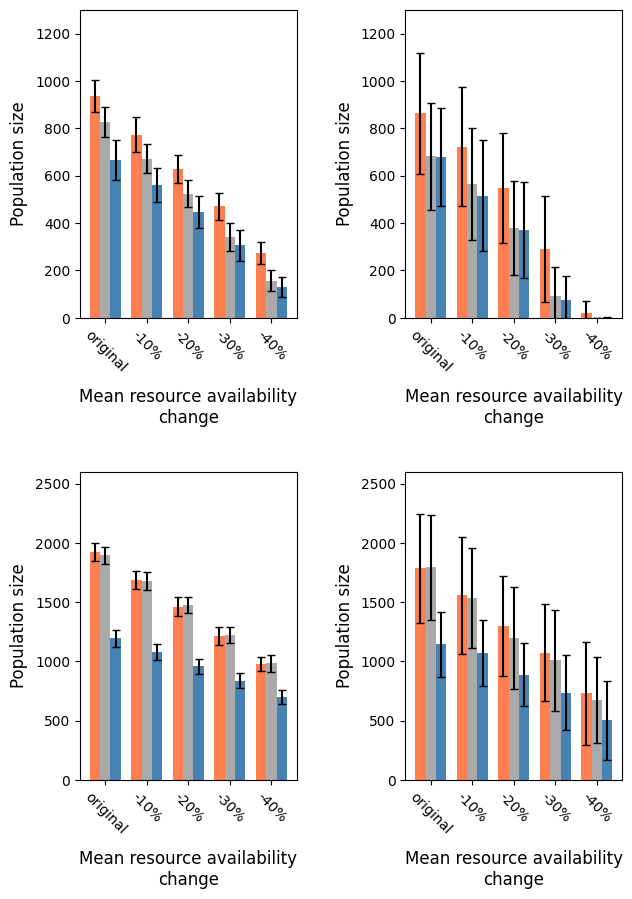

In [2]:
s_time = time.time()

data_path = "data/env_change/org"
plt.rcParams["pdf.fonttype"] = 42

output_path = "figures/fig_5_mean_res_decline"
if not os.path.isdir(output_path):
    os.makedirs(output_path)
    
para_sets = ["0701mxp0", "0704mxp0", "1301mxp0", "1307mxp0"]

plt.figure(figsize=(7, 10))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i, para_set in enumerate(para_sets):
    plt.subplot(2, 2, i+1)
    df = pd.read_csv(f"{data_path}/cao_pfs_{para_set}.csv")
    x = np.arange(df.shape[0])
    plt.bar(x-0.25, df["pop_size_mean"], yerr=df["pop_size_sd"], width=0.25, capsize=3, color="coral", label="Social populations (CA)")
    df = pd.read_csv(f"{data_path}/nso_pfs_{para_set}.csv")
    plt.bar(x, df["pop_size_mean"], yerr=df["pop_size_sd"], width=0.25, capsize=3, color="#AAAAAA", label="Nonsocial populations")
    df = pd.read_csv(f"{data_path}/rdo_pfs_{para_set}.csv")
    plt.bar(x+0.25, df["pop_size_mean"], yerr=df["pop_size_sd"], width=0.25, capsize=3, color="steelBlue", label="Social populations (RD)")
    if i < 2:
        plt.ylim(0, 1300)
    else:
        plt.ylim(0, 2600)
    plt.ylabel("Population size", fontsize=12, labelpad=5)
    plt.xticks(x, ["original", "-10%", "-20%", "-30%", "-40%"], rotation=-45)
    plt.xlabel("Mean resource availability\nchange", fontsize=12, labelpad=10)
    #plt.legend()
plt.savefig(f"{output_path}/pop_size_mean_res_decline.pdf", format="pdf", bbox_inches="tight")

e_time = time.time()
print(f"Consumed time: {(e_time-s_time):.3f}s")


### Increment in temporal variations of resource availability (Fig. S5)

In [1]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Consumed time: 1.515s


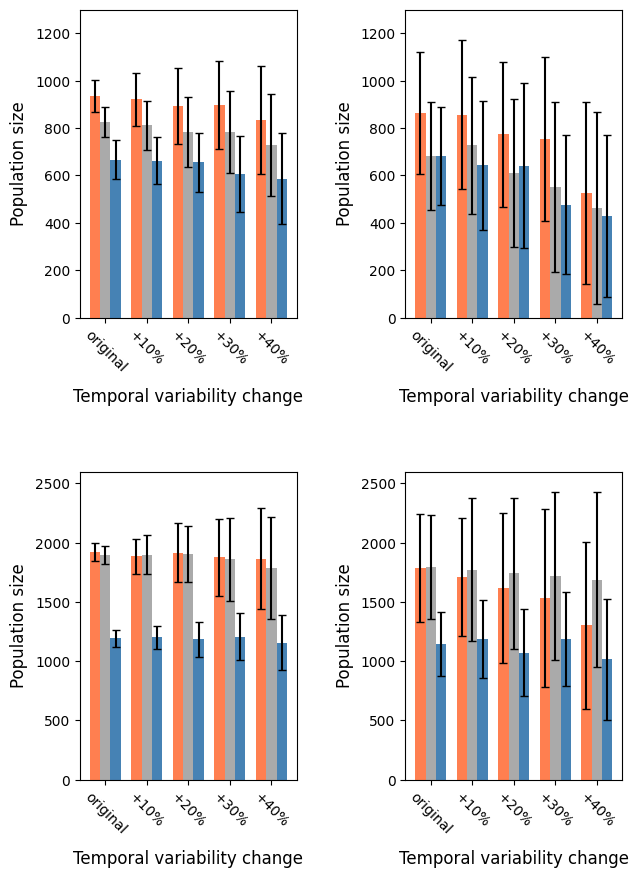

In [2]:
s_time = time.time()

data_path = "data/env_change/org"
plt.rcParams["pdf.fonttype"] = 42

output_path = "figures/fig_S5_temporal_var_increase"
if not os.path.isdir(output_path):
    os.makedirs(output_path)

para_sets = ["0701m0px", "0704m0px", "1301m0px", "1307m0px"]    

plt.figure(figsize=(7, 10))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i, para_set in enumerate(para_sets):
    plt.subplot(2, 2, i+1)
    df = pd.read_csv(f"{data_path}/cao_pfs_{para_set}.csv")
    x = np.arange(df.shape[0])
    plt.bar(x-0.25, df["pop_size_mean"], yerr=df["pop_size_sd"], width=0.25, capsize=3, color="coral", label="Social populations (CA)")
    df = pd.read_csv(f"{data_path}/nso_pfs_{para_set}.csv")
    plt.bar(x, df["pop_size_mean"], yerr=df["pop_size_sd"], width=0.25, capsize=3, color="#AAAAAA", label="Nonsocial populations")
    df = pd.read_csv(f"{data_path}/rdo_pfs_{para_set}.csv")
    plt.bar(x+0.25, df["pop_size_mean"], yerr=df["pop_size_sd"], width=0.25, capsize=3, color="steelBlue", label="Social populations (RD)")
    if i < 2:
        plt.ylim(0, 1300)
    else:
        plt.ylim(0, 2600)
    plt.ylabel("Population size", fontsize=12, labelpad=5)
    plt.xticks(x, ["original", "+10%", "+20%", "+30%", "+40%"], rotation=-45)
    plt.xlabel("Temporal variability change", fontsize=12, labelpad=10)
    #plt.legend()
plt.savefig(f"{output_path}/pop_size_temporal_var_increase.pdf", format="pdf", bbox_inches="tight")

e_time = time.time()
print(f"Consumed time: {(e_time-s_time):.3f}s")

## Plot the relationships between the percentage of change in resource availability and the proportion of CA and RD cooperators

### Mean resource availability decline (Fig. 5)

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

3.9295778274536133


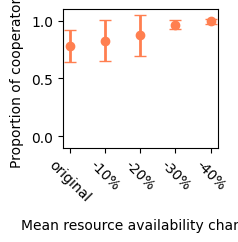

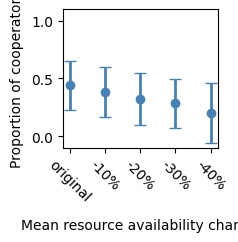

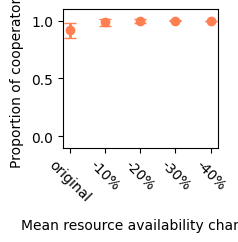

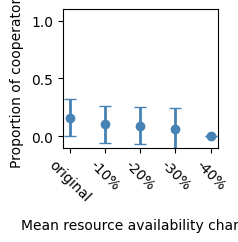

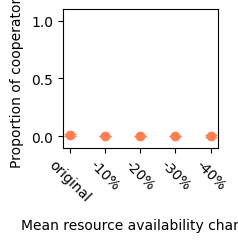

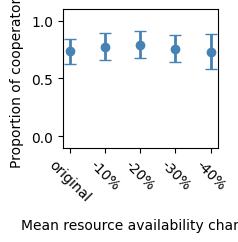

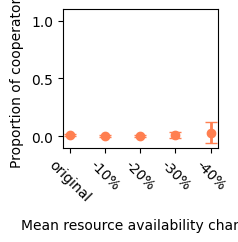

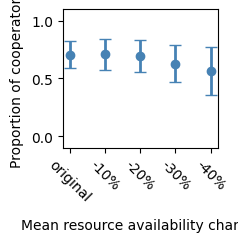

In [2]:
s_time = time.time()

data_path = "data/env_change/org"
output_path = "figures/fig_5_mean_res_decline"
if not os.path.isdir(output_path):
    os.makedirs(output_path)

scenarios = ["0701mxp0", "0704mxp0", "1301mxp0", "1307mxp0"]

plt.rcParams["pdf.fonttype"] = 42
for scenario in scenarios:
    df = pd.read_csv(f"{data_path}/cao_pfs_{scenario}.csv")
    x = np.arange(df.shape[0])
    plt.figure(figsize=(2, 1.8))
    plt.errorbar(x, df.coop_prop_mean, yerr=df.coop_prop_sd, fmt='o', elinewidth=2, capsize=4, color="coral")
    plt.ylim(-0.1, 1.1)
    plt.ylabel("Proportion of cooperators", fontsize=10, labelpad=5)
    plt.xticks(x, ["original", "-10%", "-20%", "-30%", "-40%"], rotation=-45)
    plt.xlabel("Mean resource availability change", fontsize=10, labelpad=10)
    plt.savefig(f"{output_path}/ca_coop_prop_{scenario}.pdf", format="pdf", bbox_inches="tight")
    
    df = pd.read_csv(f"{data_path}/rdo_pfs_{scenario}.csv")
    x = np.arange(df.shape[0])
    plt.figure(figsize=(2, 1.8))
    plt.errorbar(x, df.coop_prop_mean, yerr=df.coop_prop_sd, fmt='o', elinewidth=2, capsize=4, color="steelBlue")
    plt.ylim(-0.1, 1.1)
    plt.ylabel("Proportion of cooperators", fontsize=10, labelpad=5)
    plt.xticks(x, ["original", "-10%", "-20%", "-30%", "-40%"], rotation=-45)
    plt.xlabel("Mean resource availability change", fontsize=10, labelpad=10)
    plt.savefig(f"{output_path}/rd_coop_prop_{scenario}.pdf", format="pdf", bbox_inches="tight")

e_time = time.time()
print(e_time-s_time)

### Increment in temporal variations of resource availability (Fig. S5)

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2.0535857677459717


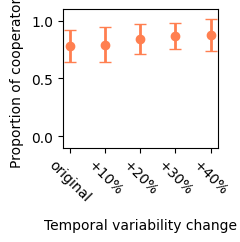

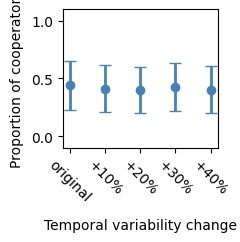

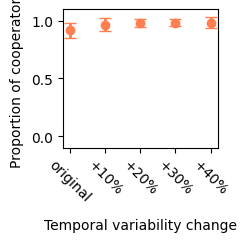

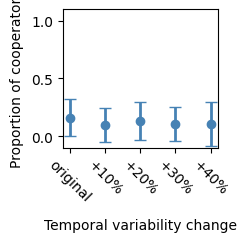

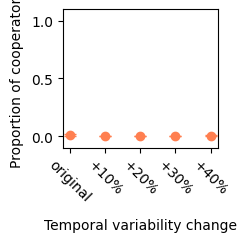

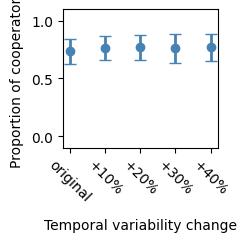

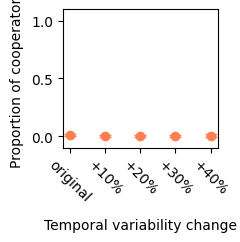

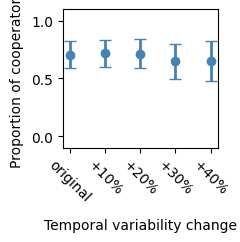

In [2]:
s_time = time.time()

data_path = "data/env_change/org"
output_path = "figures/fig_S5_temporal_var_increase"
if not os.path.isdir(output_path):
    os.makedirs(output_path)

scenarios = ["0701m0px", "0704m0px", "1301m0px", "1307m0px"]

plt.rcParams["pdf.fonttype"] = 42
for scenario in scenarios:
    df = pd.read_csv(f"{data_path}/cao_pfs_{scenario}.csv")
    x = np.arange(df.shape[0])
    plt.figure(figsize=(2, 1.8))
    plt.errorbar(x, df.coop_prop_mean, yerr=df.coop_prop_sd, fmt='o', elinewidth=2, capsize=4, color="coral")
    plt.ylim(-0.1, 1.1)
    plt.ylabel("Proportion of cooperators", fontsize=10, labelpad=5)
    plt.xticks(x, ["original", "+10%", "+20%", "+30%", "+40%"], rotation=-45)
    plt.xlabel("Temporal variability change", fontsize=10, labelpad=10)
    plt.savefig(f"{output_path}/ca_coop_prop_{scenario}.pdf", format="pdf")
    
    df = pd.read_csv(f"{data_path}/rdo_pfs_{scenario}.csv")
    x = np.arange(df.shape[0])
    plt.figure(figsize=(2, 1.8))
    plt.errorbar(x, df.coop_prop_mean, yerr=df.coop_prop_sd, fmt='o', elinewidth=2, capsize=4, color="steelBlue")
    plt.ylim(-0.1, 1.1)
    plt.ylabel("Proportion of cooperators", fontsize=10, labelpad=5)
    plt.xticks(x, ["original", "+10%", "+20%", "+30%", "+40%"], rotation=-45)
    plt.xlabel("Temporal variability change", fontsize=10, labelpad=10)
    plt.savefig(f"{output_path}/rd_coop_prop_{scenario}.pdf", format="pdf")

e_time = time.time()
print(e_time-s_time)